In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import numpy as np
import scipy 
import matplotlib.pyplot as plt
import sys 
import pdb
from pyuoi.linear_model.var import VAR
from sklearn.model_selection import KFold
from tqdm import tqdm

In [4]:
sys.path.append('/home/akumar/nse/neural_control')

In [53]:
from loaders import load_sabes
from segmentation import reach_segment_sabes
from utils import form_companion

In [6]:
dat = load_sabes('/mnt/sdb1/nc_data/sabes/indy_20160627_01.mat')

In [7]:
X = dat['spike_rates'].squeeze()

In [58]:
# Question 1: Affect of self regression on the spectrum and predictive capacity
Asr = []
r2sr = []

A = []
r2 = []

for train_idxs, test_idxs in tqdm(KFold(n_splits=5).split(X)):
    # varmodel = VAR(estimator='ols', self_regress=True, order=3)
    # varmodel.fit(X[train_idxs])
    # Asr.append(varmodel.coef_.squeeze())
    # r2sr.append(varmodel.score(X[test_idxs]))
    
    varmodel = VAR(estimator='ols', self_regress=False, order=3)
    varmodel.fit(X[train_idxs])
    A.append(varmodel.coef_.squeeze())
    r2.append(varmodel.score(X[test_idxs]))


0it [00:00, ?it/s]/home/akumar/anaconda3/envs/dyn/lib/python3.7/site-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), VAR_OLS_Wrapper())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,
/home/akumar/anaconda3/envs/dyn/lib/python3.7/site-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:



In [14]:
# Nonlinear least squares 

[0.02944863548635064,
 0.03676642160075907,
 0.04171878633622061,
 0.04111464384334377,
 0.02789409213024925]

In [60]:
r2

[0.021486132597502733,
 0.030458848136075748,
 0.03689677508122002,
 0.0349546294776539,
 0.008420176776919334]

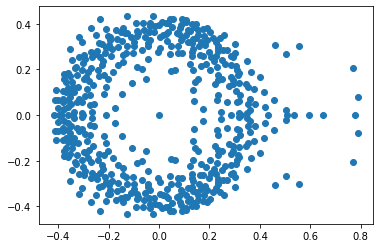

In [61]:
plt.scatter(np.real(np.linalg.eigvals(form_companion(A[0]))), np.imag(np.linalg.eigvals(form_companion(A[0]))))

In [8]:
# Filter by low error reaches
dat = reach_segment_sabes(dat, data_file='indy_20160627_01', err_thresh=0.5)

Reminder that start times depend on the bin size


/home/akumar/nse/neural_control/segmentation.py:68: RuntimeWarning: divide by zero encountered in double_scalars
  m = straight[1]/straight[0]


In [16]:
# Truncate at 15 to allow for an even array
X = np.array([dat['spike_rates'].squeeze()[t[0]:t[1]][0:15] for t in dat['transition_times']])

In [17]:
# Question 1: Affect of self regression on the spectrum and predictive capacity
Asret = []
r2sret = []

Aet = []
r2et = []

for train_idxs, test_idxs in tqdm(KFold(n_splits=5).split(X)):
    varmodel = VAR(estimator='ols', self_regress=True, order=1)
    varmodel.fit(X[train_idxs])
    Asret.append(varmodel.coef_.squeeze())
    r2sret.append(varmodel.score(X[test_idxs]))
    
    varmodel = VAR(estimator='ols', self_regress=False, order=1)
    varmodel.fit(X[train_idxs])
    Aet.append(varmodel.coef_.squeeze())
    r2et.append(varmodel.score(X[test_idxs]))


0it [00:00, ?it/s]/home/akumar/anaconda3/envs/dyn/lib/python3.7/site-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), VAR_OLS_Wrapper())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,
/home/akumar/anaconda3/envs/dyn/lib/python3.7/site-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:



In [20]:
X = dat['spike_rates'].squeeze()
xsmooth = scipy.ndimage.gaussian_filter1d(X, sigma=1, axis=0)

In [28]:
# Question 1: Affect of self regression on the spectrum and predictive capacity
Asr_smooth = []
r2sr_smooth = []

A_smooth = []
r2_smooth = []

for train_idxs, test_idxs in tqdm(KFold(n_splits=5).split(xsmooth)):
    varmodel = VAR(estimator='ols', self_regress=True, order=1)
    varmodel.fit(xsmooth[train_idxs])
    Asr_smooth.append(varmodel.coef_.squeeze())
    r2sr_smooth.append(varmodel.score(xsmooth[test_idxs]))
    
    varmodel = VAR(estimator='ols', self_regress=False, order=1)
    varmodel.fit(xsmooth[train_idxs])
    A_smooth.append(varmodel.coef_.squeeze())
    r2_smooth.append(varmodel.score(xsmooth[test_idxs]))


0it [00:00, ?it/s]/home/akumar/anaconda3/envs/dyn/lib/python3.7/site-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), VAR_OLS_Wrapper())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,
/home/akumar/anaconda3/envs/dyn/lib/python3.7/site-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:



In [31]:
r2_smooth

[0.07880512344890146,
 0.09820556028481668,
 0.11064222565935421,
 0.10777592289053996,
 0.05758718113630585]

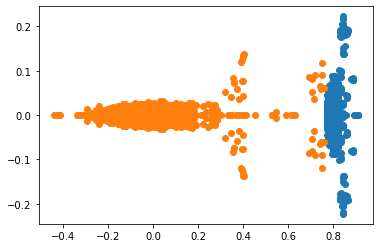

In [30]:
plt.scatter(np.real(np.linalg.eigvals(Asr_smooth)), np.imag(np.linalg.eigvals(Asr_smooth)))
plt.scatter(np.real(np.linalg.eigvals(A_smooth)), np.imag(np.linalg.eigvals(A_smooth)))

In [34]:
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV
from sklearn.preprocessing import StandardScaler

In [38]:
# Regression on first differences
A_diff = []
r2_diff = []

for train_idxs, test_idxs in tqdm(KFold(n_splits=5).split(X)):

    xtrain = StandardScaler().fit_transform(X[train_idxs])
    xtest = StandardScaler().fit_transform(X[test_idxs])
    linmodel = LinearRegression()

    linmodel.fit(xtrain[:-1, :], np.diff(xtrain, axis=0))
    r2 = linmodel.score(xtest[:-1, :], np.diff(xtest, axis=0))

    A_diff.append(linmodel.coef_)
    r2_diff.append(r2)

5it [00:03,  1.51it/s]


In [40]:
r2_diff

[0.463592308777434,
 0.4679500589074835,
 0.4626768399710865,
 0.46458185703834576,
 0.46047579576317366]

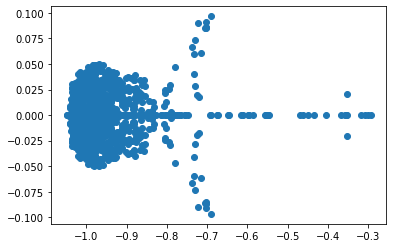

In [41]:
plt.scatter(np.real(np.linalg.eigvals(A_diff)), np.imag(np.linalg.eigvals(A_diff)))

In [42]:
from dca.cov_util import form_lag_matrix

In [56]:
# Try a higher order model with smoothing
Asr = []
r2sr = []

A = []
r2 = []

for train_idxs, test_idxs in tqdm(KFold(n_splits=5).split(X)):

    xtrain = StandardScaler().fit_transform(X[train_idxs])
    xtest = StandardScaler().fit_transform(X[test_idxs])

    #xtrain = scipy.ndimage.gaussian_filter1d(xtrain, axis=0, sigma=1)
    #xtest = scipy.ndimage.gaussian_filter1d(xtest, axis=0, sigma=1)

    # Don't allow self regression
    

    linmodel = LinearRegression()
    linmodel.fit(form_lag_matrix(xtrain, 3), xtrain[2:])
    r2_= linmodel.score(form_lag_matrix(xtest, 3), xtest[2:])
    print(r2_)

    A.append(linmodel.coef_.reshape((xtrain.shape[1], xtrain.shape[1], -1)))


1it [00:03,  3.71s/it]

0.9942196531791907


2it [00:07,  3.49s/it]

1.0


3it [00:10,  3.41s/it]

0.9942196531791907


4it [00:15,  4.00s/it]

1.0


5it [00:18,  3.72s/it]

1.0


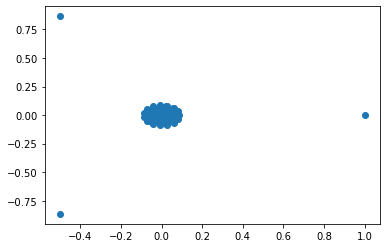

In [57]:
plt.scatter(np.real(np.linalg.eigvals(form_companion(A[0].transpose((2, 0,1))))), np.imag(np.linalg.eigvals(form_companion(A[0].transpose((2, 0, 1))))))

In [ ]:
# Other alternatives
# (1) Regress on 1st differences
# Smooth
# (2) Use low rank input
# (3) Use nonlinear least squares with an RNN model, and then look at the Jacobian

In [ ]:
# What is actually a good model for the data?
